# ***Network Intrusion Detection using Deep Learning***
The University of Nevada - Reno Intrusion Detection Dataset (UNR-IDD) addresses the limitations of existing datasets used for Machine Learning-based Network Intrusion Detection Systems (NIDS), such as sub-optimal performance and low accuracy of tail classes. It offers a broader range of samples and scenarios, enhancing the effectiveness of intrusion detection..


 **The labels for multi-class classification in UNR-IDD are illustrated in the accompanying table.**

| Label	      | Description                   |
| ----------- | -----------                   |
|Normal       |	Normal| Network Functionality.|
|TCP-SYN      |	TCP-SYN Flood.                |
|PortScan     |	Port Scanning.                |
|Overflow     |	Flow Table Overflow.          |
|Blackhole    |	Blackhole Attack.             |
|Diversion    |	Traffic Diversion Attack.     |

# **Table Of Contents**
##### **1. Exploratory Data Analysis**
##### **2. Prepare the Data for neural network Model**
##### **3. Build Multilayer Perceptron Model and Baseline Model**
##### **4. t-Sne, PCA for Dimensionality Reduction**
##### **5. Feature Selection (Anova and Mutual Information)**
##### **6. Optimal Value of Batch Size, Hidden Layers and Activation**
##### **Function.**  
##### **7. Conclusion - Confusion Matrix with highest value of Metrics**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
seed = 0
tf.random.set_seed(seed)

# ***Exploratory Data Analysis***

In [ ]:
train = pd.read_csv('/network_train.csv')
train.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow


In [ ]:
val = pd.read_csv('/network_val.csv')
val.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:000000000000000a,Port#:1,2594,75671796,31757809,3308,1672,0,0,560,...,2,0,0,0,0,0,6,12271,12057,Diversion
1,of:0000000000000002,Port#:1,10,856,9732,74,61,0,0,348,...,2,0,0,0,0,0,8,778,697,TCP-SYN
2,of:000000000000000a,Port#:3,2192,12805806,31695352,2412,1566,57,1839337,2615,...,2,0,0,0,0,0,6,6233,6156,Blackhole
3,of:0000000000000002,Port#:1,401,6327186,24401,240,131,85,6316,759,...,4,0,0,0,0,0,6,1228,1134,PortScan
4,of:0000000000000002,Port#:1,3799,82050574,88575612,5526,2547,0,0,556,...,1,0,0,0,0,0,4,10977,10896,Blackhole


In [ ]:
test  = pd.read_csv('/network_test.csv')
test.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:2,117,15705,15537,113,126,2,278,348,...,3,0,0,0,0,0,6,2350,2265,TCP-SYN
1,of:000000000000000a,Port#:4,349224,14743367,38139845,156153,1430,4,556,560,...,4,0,0,0,0,0,4,649491,649367,Normal
2,of:000000000000000a,Port#:2,127,8855,6316408,271,96,0,0,280,...,2,0,0,0,0,0,6,3933,3848,TCP-SYN
3,of:0000000000000005,Port#:3,1396,25241475,31751210,2853,2172,178,4992757,7565,...,1,0,0,0,0,0,8,10237,10113,Blackhole
4,of:000000000000000a,Port#:1,12,1016,13549,101,101,0,0,556,...,2,0,0,0,0,0,10,6269,6181,TCP-SYN


### ***Split the data as features and target***

In [ ]:
# For training Data
X_train = train.drop('Label',axis=1)
y_train = train['Label']

# For testing Data
X_test = test.drop('Label',axis=1)
y_test = test['Label']

X_val = val.drop('Label',axis=1)
y_val = val['Label']
X_train.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,5,1,0,0,0,0,0,4,819,757
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,5,2,0,0,0,0,0,5,1018,918
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,5,2,0,0,0,0,0,8,987400,987276
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,4,3,0,0,0,0,0,8,195879,195780
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,5,1,0,0,0,0,0,4,4524,4411


### ***Convert categorical data into numerical by one hot encoding***

In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric.head()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,240,16586,12622603,467,126,0,0,280,2,5,...,False,False,False,False,False,False,False,False,False,False
1,158,20530,35464,376,171,4,556,3407,43,5,...,False,False,False,False,False,False,False,True,False,False
2,1930,37881404,67857371,414333,1297,0,0,556,4,5,...,False,False,True,False,False,False,False,False,True,False
3,903,18946410,17900326,98088,176,3,320,270280,5002,4,...,False,False,False,False,False,False,False,False,False,True
4,423,29020,19138042,1562,1451,0,0,560,4,5,...,False,False,False,False,False,True,False,False,False,False


### ***Number of instances per class***

In [ ]:
y_train.value_counts()

Label
PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: count, dtype: int64

### ***Number of null values per feature***

In [ ]:
X_train_numeric.isnull().sum()

Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Switch ID_of:0000000000000002    0
Switch ID_of:0000000000000003    0
Switch ID_of:0000000000000004    0
Switch ID_of:0000000000000005    0
Switch ID_of:0000000000000006    0
Switch ID_of:0000000000000007    0
Switch ID_of:0000000000000008    0
Switch ID_of:0000000000000009    0
Switch ID_of:000000000000000a    0
Switch ID_of:0000000

#### **There is no null values per features**

## **Checking the outliers via boxplot**

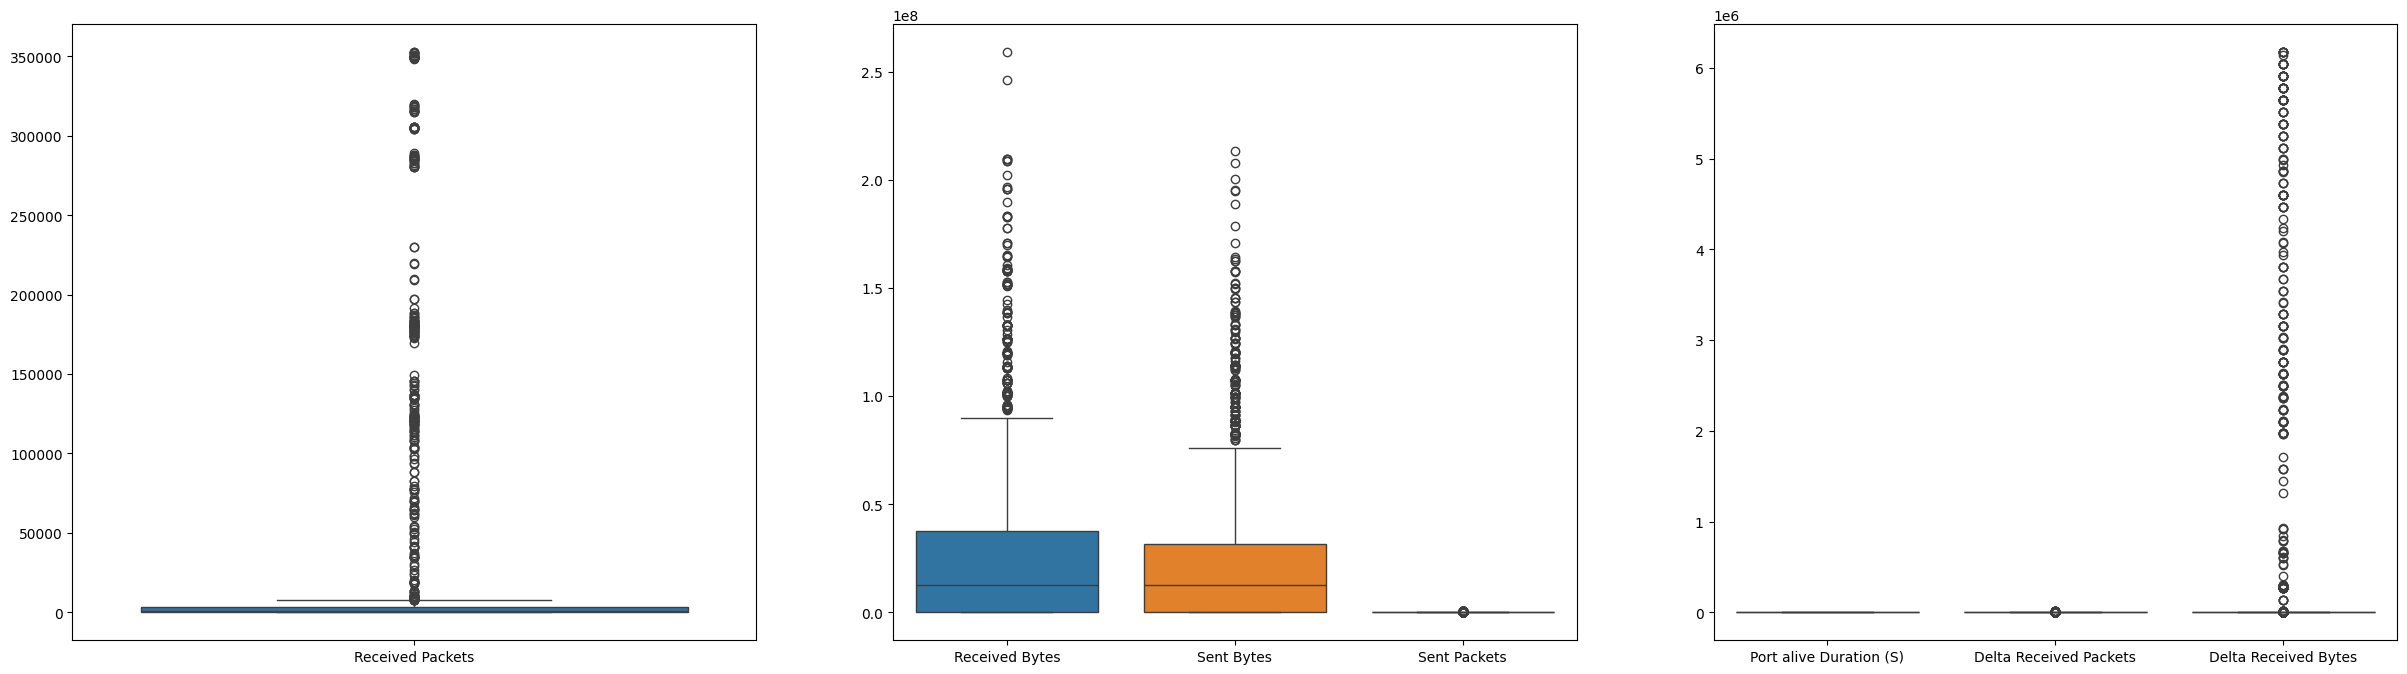

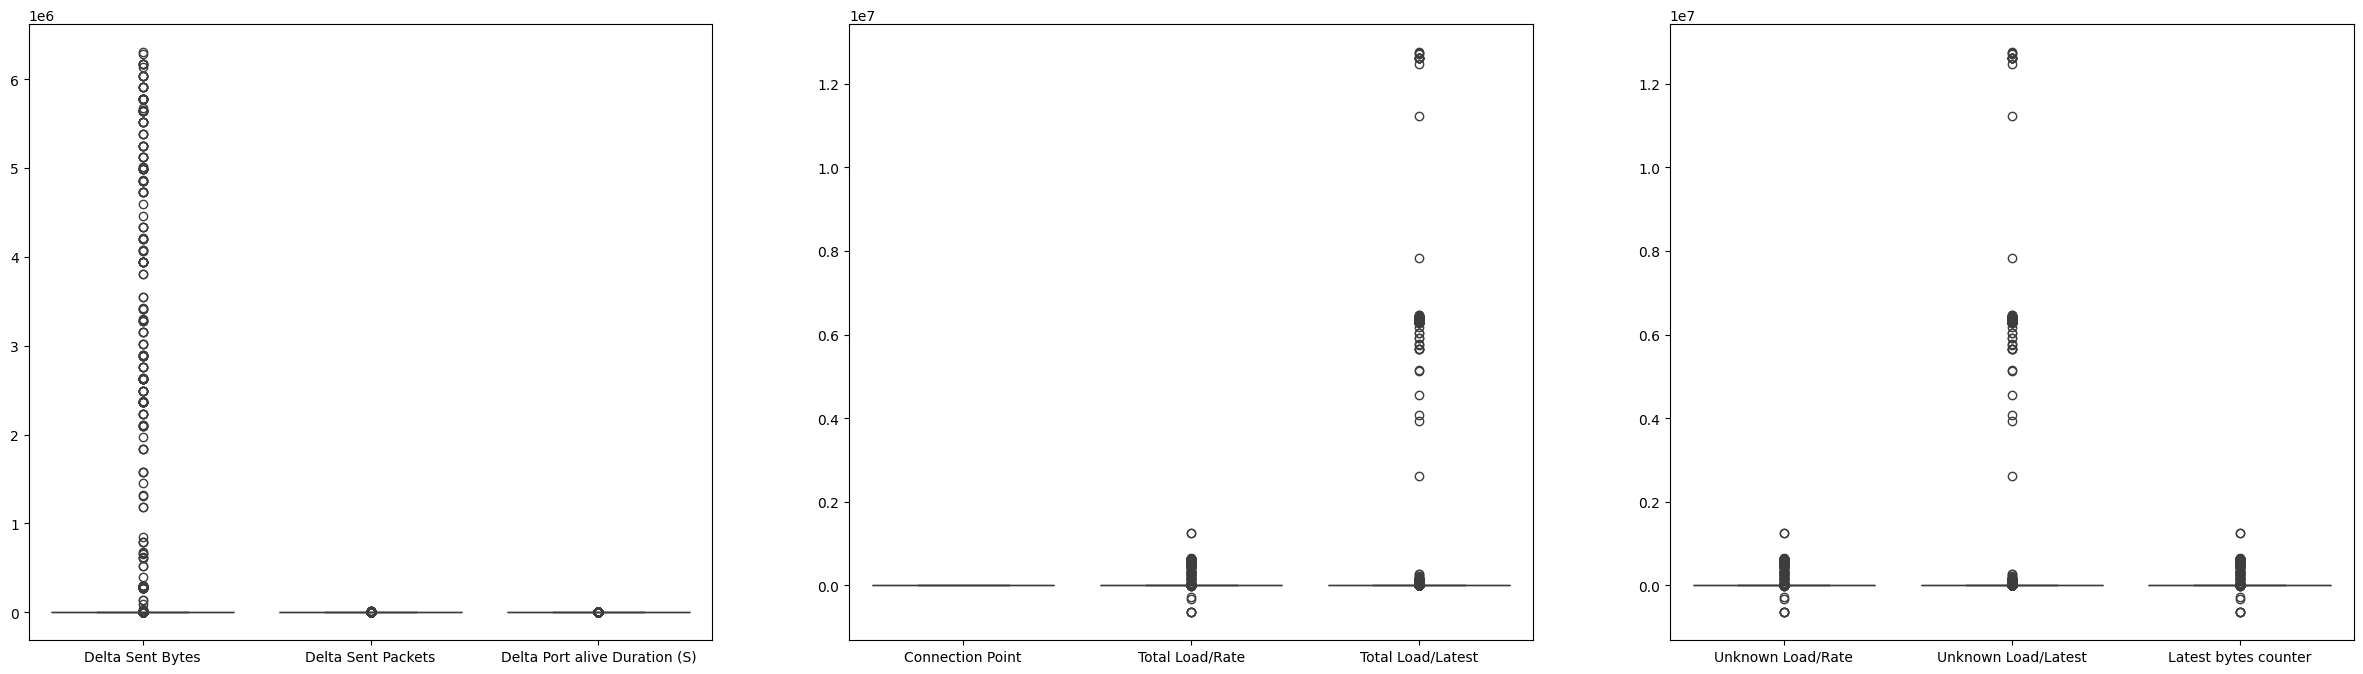

In [ ]:
for i in range(0,18,9) :
    fig,axis = plt.subplots(1,3,figsize=(30,8))
    sns.boxplot(data = X_train.iloc[:,i:i+3], ax = axis[0])
    sns.boxplot(data = X_train.iloc[:,i+3:i+6], ax = axis[1])
    sns.boxplot(data = X_train.iloc[:,i+6:i+9], ax = axis[2])
    plt.show()

## **Count the outliers**

In [ ]:
# Not Calculating extreme Outliers (In case of extreme Outliers multiply 3 with IQR in place of 1.5)
for i,col in enumerate(X_train_numeric.columns):
    if i > 18 :
        break
    q_low = X_train[col].quantile(0.25)
    q_hi  = X_train[col].quantile(0.75)
    IQR = (q_hi-q_low)
    df_filtered = X_train[(X_train[col] > (q_hi + 1.5 * IQR)) | (X_train[col] < (q_low - 1.5 * IQR))]
    print(f'Feature name {col} --> number of outliers is {len(df_filtered)}')

Feature name Received Packets --> number of outliers is 312
Feature name Received Bytes --> number of outliers is 186
Feature name Sent Bytes --> number of outliers is 222
Feature name Sent Packets --> number of outliers is 379
Feature name Port alive Duration (S) --> number of outliers is 0
Feature name Delta Received Packets --> number of outliers is 649
Feature name Delta Received Bytes --> number of outliers is 648
Feature name Delta Sent Bytes --> number of outliers is 604
Feature name Delta Sent Packets --> number of outliers is 604
Feature name Delta Port alive Duration (S) --> number of outliers is 441
Feature name Connection Point --> number of outliers is 0
Feature name Total Load/Rate --> number of outliers is 396
Feature name Total Load/Latest --> number of outliers is 501
Feature name Unknown Load/Rate --> number of outliers is 396
Feature name Unknown Load/Latest --> number of outliers is 501
Feature name Latest bytes counter --> number of outliers is 396
Feature name Act

### **The statistical analysis for every feature (mean, std, min, max)**

In [ ]:
X_train_numeric.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,...,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,...,0.046201,0.072165,0.057274,0.050019,0.128293,0.058037,0.138221,0.326079,0.246277,0.121039
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,...,0.209960,0.258810,0.232409,0.218026,0.334480,0.233859,0.345197,0.468866,0.430924,0.326234
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Prepare the data for neural network model**

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_train_numeric.columns)
X_val_scaled= pd.DataFrame(scaler.transform(X_val_numeric), columns = X_val_numeric.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test_numeric), columns = X_test_numeric.columns)
X_train_scaled.head()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.279034,-0.266725,-0.163127,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,-0.371088
1,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.278558,-0.263902,-0.120959,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,1.437618,-0.571619,-0.371088
2,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.279034,-0.266476,-0.161070,0.449977,...,-0.220088,-0.278887,4.057093,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,1.749419,-0.371088
3,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,-0.278760,-0.022965,4.979328,-2.222336,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,2.694778
4,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.279034,-0.266472,-0.161070,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,4.02868,-0.400487,-0.695595,-0.571619,-0.371088


In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Received Packets               2619 non-null   float64
 1   Received Bytes                 2619 non-null   float64
 2   Sent Bytes                     2619 non-null   float64
 3   Sent Packets                   2619 non-null   float64
 4   Port alive Duration (S)        2619 non-null   float64
 5   Delta Received Packets         2619 non-null   float64
 6   Delta Received Bytes           2619 non-null   float64
 7   Delta Sent Bytes               2619 non-null   float64
 8   Delta Sent Packets             2619 non-null   float64
 9   Delta Port alive Duration (S)  2619 non-null   float64
 10  Connection Point               2619 non-null   float64
 11  Total Load/Rate                2619 non-null   float64
 12  Total Load/Latest              2619 non-null   f

### **Convert to tensors**

In [ ]:
X_train_scaled_tensor=tf.convert_to_tensor(X_train_scaled, dtype=np.float64)
X_val_scaled_tensor=tf.convert_to_tensor(X_val_scaled,dtype=np.float64)
X_test_scaled_tensor=tf.convert_to_tensor(X_test_scaled,dtype=np.float64)
X_train_scaled_tensor

<tf.Tensor: shape=(2619, 33), dtype=float64, numpy=
array([[-0.31856254, -0.70978461, -0.33553717, ..., -0.69559521,
        -0.57161851, -0.37108805],
       [-0.31988928, -0.70967715, -0.71589647, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.29121895,  0.32192611,  1.333552  , ..., -0.69559521,
         1.74941851, -0.37108805],
       ...,
       [-0.31620032, -0.53790819, -0.71656668, ..., -0.69559521,
         1.74941851, -0.37108805],
       [-0.30938869, -0.36586654,  0.04660094, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.31362775, -0.53753359, -0.33542854, ...,  1.43761773,
        -0.57161851, -0.37108805]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded

array([5, 5, 2, ..., 5, 0, 5])

# **Build MultiLayer Perceptron Model**

In [ ]:
from statistics import mean
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### **Plot History**

In [ ]:
def plot_history(dict_of_lists, type='loss'):
    """
    Plot the training and validation metrics (loss or accuracy) for multiple models.

    Parameters:
    dict_of_lists: A list of training histories for different models.
    type: The type of metric to plot ('loss' or 'accuracy'). Default is 'loss'.

    Returns:
    None
    """
    # Define subplot grid positions
    axis_idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    # Create a figure with 2 rows and 3 columns of subplots
    fig, axes = plt.subplots(2, 3, figsize=(20,10))

    # Iterate over each model's history
    for i in range(len(dict_of_lists)):
        # Get the specific subplot axes for the current model
        ax = axes[axis_idx[i][0]][axis_idx[i][1]]
        # Plot the training history for the specified metric
        ax.plot(dict_of_lists[i].history[type])
        ax.plot(dict_of_lists[i].history[f'val_{type}'])
        # Set the title, labels, and legend for the subplot
        ax.set_title(f'Model {i+1} {type.title()}', size=15)
        ax.set_ylabel(f'{type.title()}', size=10)
        ax.set_xlabel('Epoch', size=10)
        ax.legend(['train', 'test'], loc='upper left')

    # Set the main title for the entire figure
    plt.suptitle(f'Models {type.title()} per Epoch', size=15, y=0.93)
    # Show the plot
    plt.show()


### **Build Model**

In [ ]:
def Build_model(X_train, y_train, X_val, y_val, X_test, y_test, optimizer,
                n_of_hidden_layers, n_neurons, activation='relu', epochs=500, batch_size=1024, early_stopping=True):
    """
    Build and train a neural network model with given parameters.

    Parameters:
    X_train, y_train: Training data and labels.
    X_val, y_val: Validation data and labels.
    X_test, y_test: Test data and labels.
    optimizer: Optimizer for model compilation.
    n_of_hidden_layers: Number of hidden layers in the model.
    n_neurons: Number of neurons in each hidden layer.
    activation: Activation function for hidden layers.
    epochs: Number of epochs for training.
    batch_size: Batch size for training.
    early_stopping: Boolean to indicate if early stopping should be used.

    Returns:
    model: Trained Keras model.
    history: Training history.
    train_evaluation: Evaluation metrics on training data.
    validation_evaluation: Evaluation metrics on validation data.
    test_evaluation: Evaluation metrics on test data.
    """

    # Initialize a sequential model
    model = tf.keras.models.Sequential()

    # Add an input layer with shape based on the training data
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))

    # Add the specified number of hidden layers with the given number of neurons and activation function
    for _ in range(n_of_hidden_layers):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation))

    # Add an output layer with 6 neurons (for 6 classes) and softmax activation
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    # Compile the model with the specified optimizer, loss function, and metrics
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Early stopping callback to prevent overfitting
    es = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        mode="auto",
        baseline=None,
        restore_best_weights=True,
    )

    # Fit the model with or without early stopping based on the early_stopping parameter
    if early_stopping:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=epochs, batch_size=batch_size, callbacks=[es], verbose=0)
    else:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on training, validation, and test datasets
    train_evaluation = model.evaluate(X_train, y_train)
    test_evaluation = model.evaluate(X_test, y_test)
    validation_evaluation = model.evaluate(X_val, y_val)

    return model, history, train_evaluation, validation_evaluation, test_evaluation

In [ ]:
def Build_experiment(X_train, y_train, X_val, y_val, X_test, y_test, optimizer,
                     n_of_hidden_layers, n_neurons, activation='relu', epochs=500, batch_size=1024, n_of_models=5, early_stopping=True):

    # Dictionary to store models and their training history
    models_dict = {'models': [], 'history': []}

    # Lists to store accuracy metrics for each model
    models_train_acc = []
    models_test_acc = []
    models_valid_acc = []

    # Train multiple models
    for j in range(n_of_models):
        # Build and train a model
        model, history, train_evaluation, valid_evaluation, test_evaluation = Build_model(
            X_train, y_train, X_val, y_val, X_test, y_test, optimizer,
            n_of_hidden_layers, n_neurons, activation=activation, epochs=epochs, batch_size=batch_size, early_stopping=early_stopping
        )

        # Save accuracy metrics
        models_train_acc.append(train_evaluation[1])
        models_test_acc.append(test_evaluation[1])
        models_valid_acc.append(valid_evaluation[1])

        # Save the model and its training history
        models_dict['models'].append(model)
        models_dict['history'].append(history)

    # Dictionary to store accuracy statistics
    accuracies_dict = {}
    accuracies_dict["Min_train_acc"] = min(models_train_acc)
    accuracies_dict["Max_train_acc"] = max(models_train_acc)
    accuracies_dict["AVG_train_acc"] = sum(models_train_acc) / len(models_train_acc)

    accuracies_dict["Min_test_acc"] = min(models_test_acc)
    accuracies_dict["Max_test_acc"] = max(models_test_acc)
    accuracies_dict["AVG_test_acc"] = sum(models_test_acc) / len(models_test_acc)

    accuracies_dict["Min_valid_acc"] = min(models_valid_acc)
    accuracies_dict["Max_valid_acc"] = max(models_valid_acc)
    accuracies_dict["AVG_valid_acc"] = sum(models_valid_acc) / len(models_valid_acc)

    return accuracies_dict, models_dict, models_train_acc, models_test_acc, models_valid_acc

## **Baseline Model**

In [ ]:
# Define the optimizer with AdamW, a variation of the Adam optimizer that includes weight decay (L2 regularization)
optimizer = AdamW(learning_rate=0.001, weight_decay=0.00001)

# Call the Build_experment function to build, train, and evaluate multiple models
base_line_accuracies_dict, base_line_models_dict, base_line_models_train_acc, base_line_models_test_acc, base_line_models_valid_acc = Build_experiment(
    X_train_scaled_tensor,   # Training data (scaled tensor format)
    y_train_encoded,         # Training labels (encoded)
    X_val_scaled_tensor,     # Validation data (scaled tensor format)
    y_val_encoded,           # Validation labels (encoded)
    X_test_scaled_tensor,    # Test data (scaled tensor format)
    y_test_encoded,          # Test labels (encoded)
    optimizer,               # Optimizer defined above
    n_of_hidden_layers=1,    # Number of hidden layers in each model
    n_neurons = 10,            # Number of neurons in each hidden layer
    activation = 'relu',       # Activation function for hidden layers
    epochs = 500,              # Number of epochs for training each model
    batch_size = 1024,         # Batch size for training
    n_of_models = 5,           # Number of models to build and train
    early_stopping = False     # Disable early stopping
)

18/18 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7433


## **Plot the training and testing losses vs. the number of epochs**

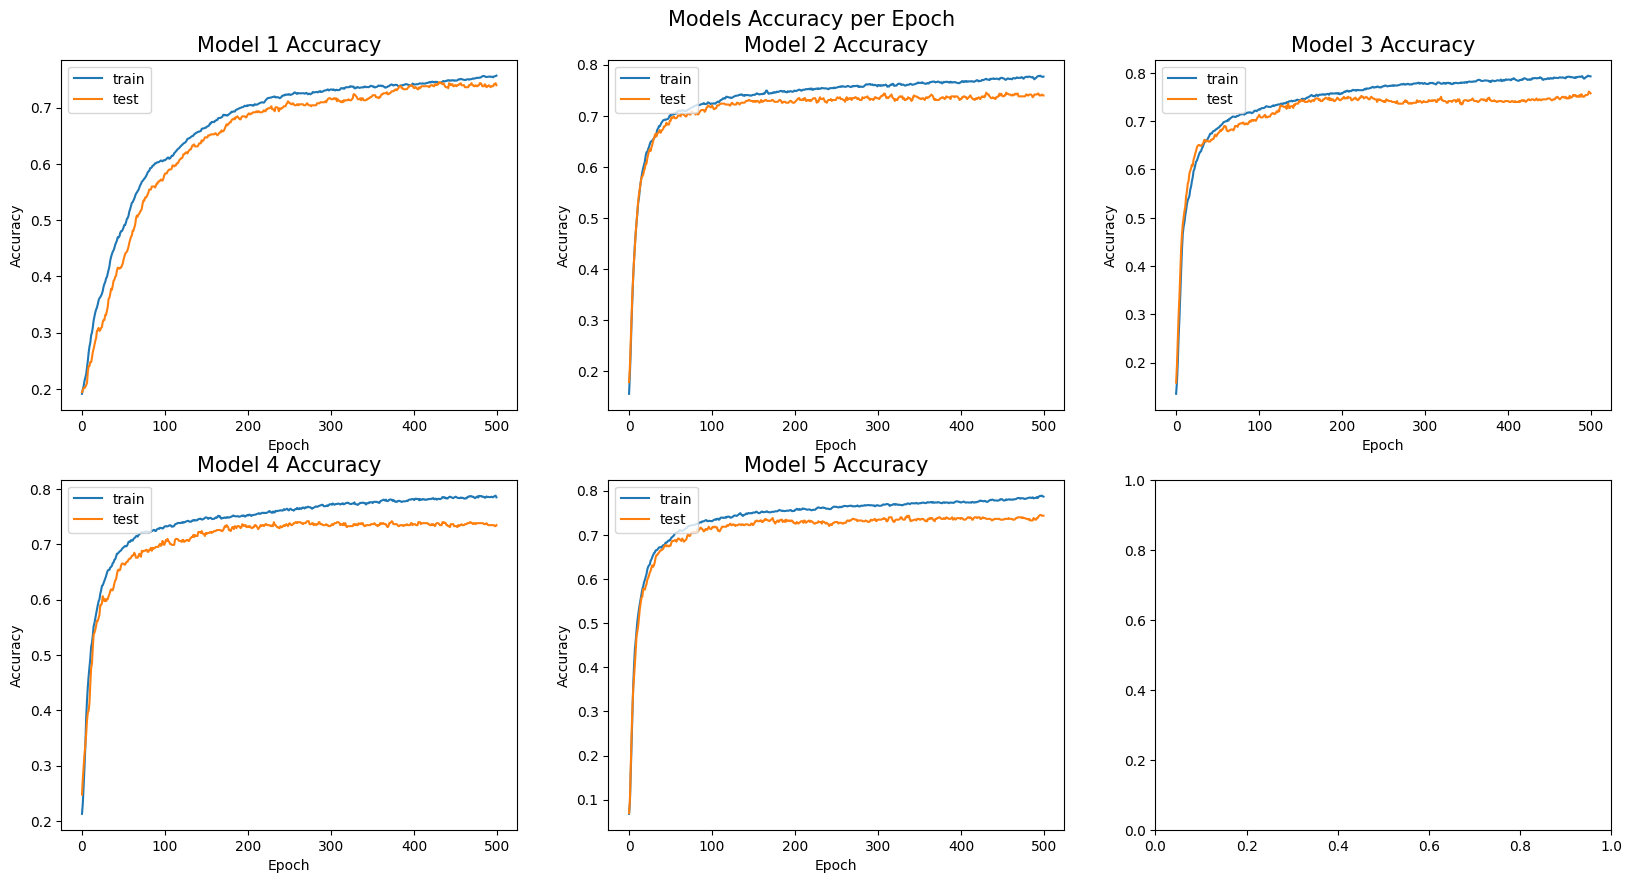

In [ ]:
plot_history(base_line_models_dict['history'], type='accuracy')

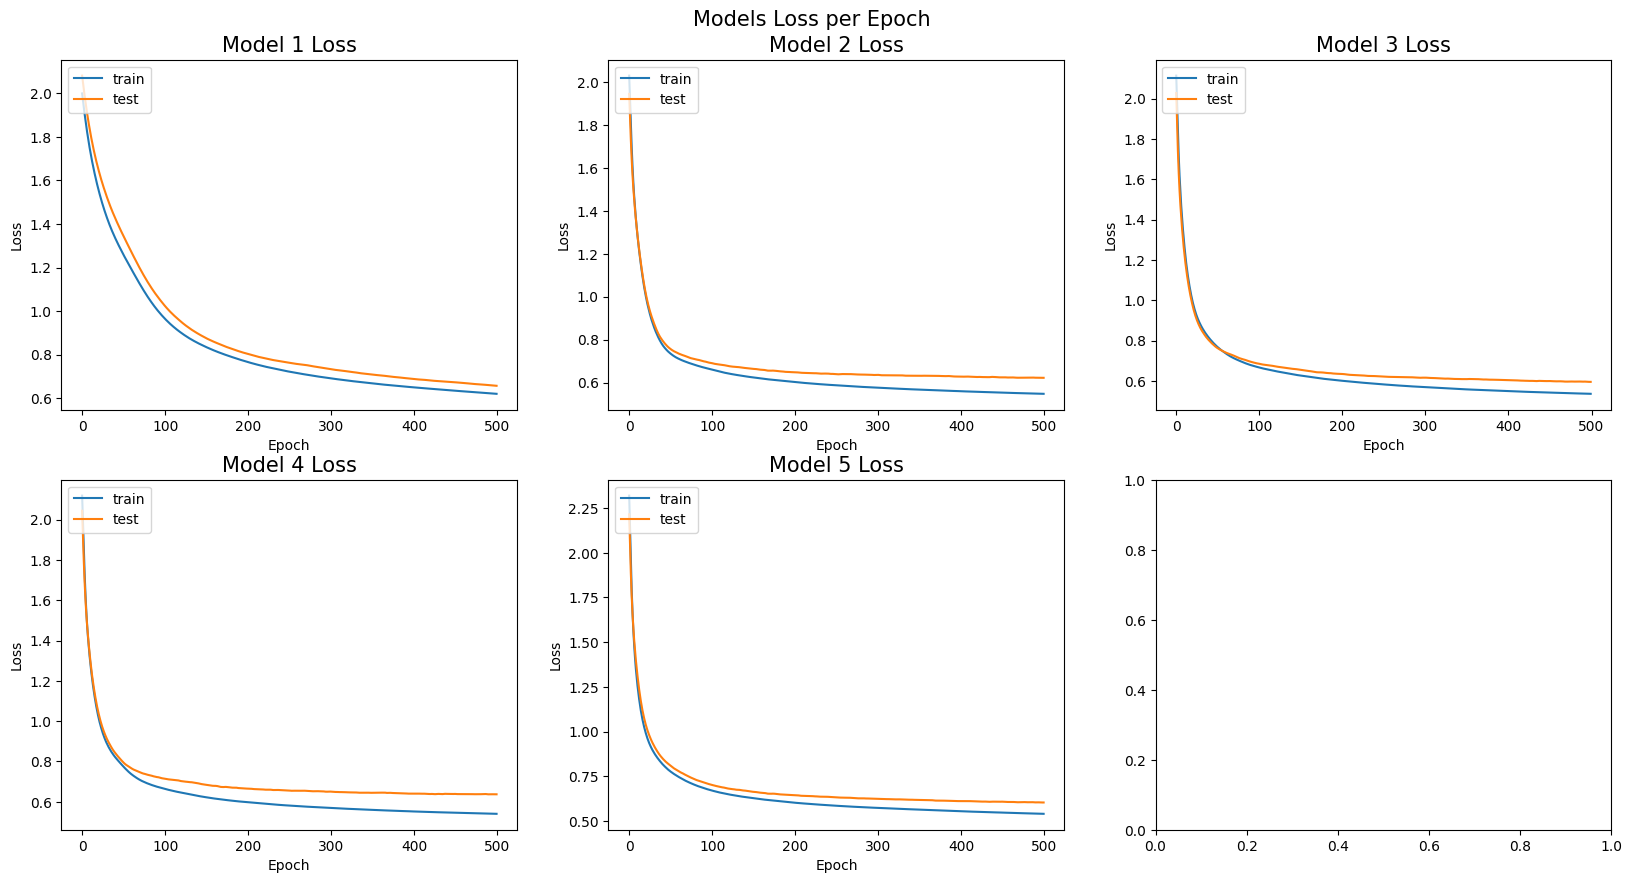

In [ ]:
plot_history(base_line_models_dict['history'], type='loss')

## **Table of Accuracies**

In [ ]:
 pd.DataFrame(pd.Series(base_line_accuracies_dict)).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.756777,0.793433,0.779916,0.713012,0.730838,0.722638,0.734403,0.757576,0.742959


## **The confusion matrix based on the average test accuracy**

In [ ]:
# Calculate the Average confusion test matrix
cm = np.zeros(shape=(6,6))
for model in base_line_models_dict['models']:
    pred = model.predict(X_test_scaled).argmax(axis=1)
    cm += confusion_matrix(y_test_encoded, pred)
cm_avg = cm/ len(base_line_models_dict['models'])

18/18 [==============================] - 0s 2ms/step


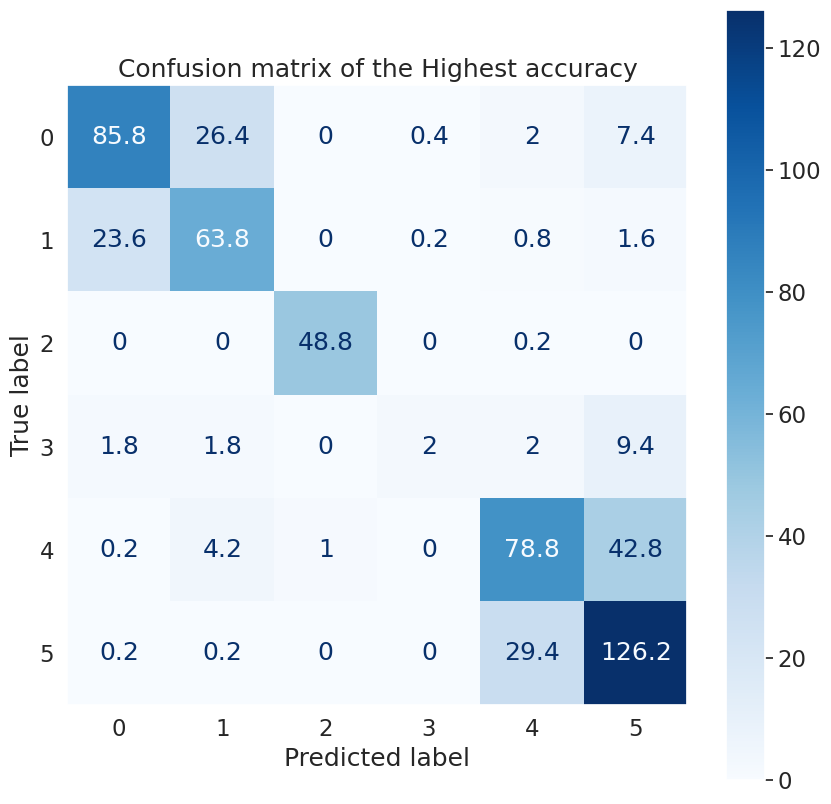

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

## **THE 2D TSNE plots**

In [ ]:
from sklearn.manifold import TSNE

sns.set_context("notebook", font_scale=2)
def TSNE_visualizer(data_set):
  tsne = TSNE(n_components = 2, random_state = 0,init = 'pca', learning_rate = 'auto')
  z = tsne.fit_transform(data_set)
  return z

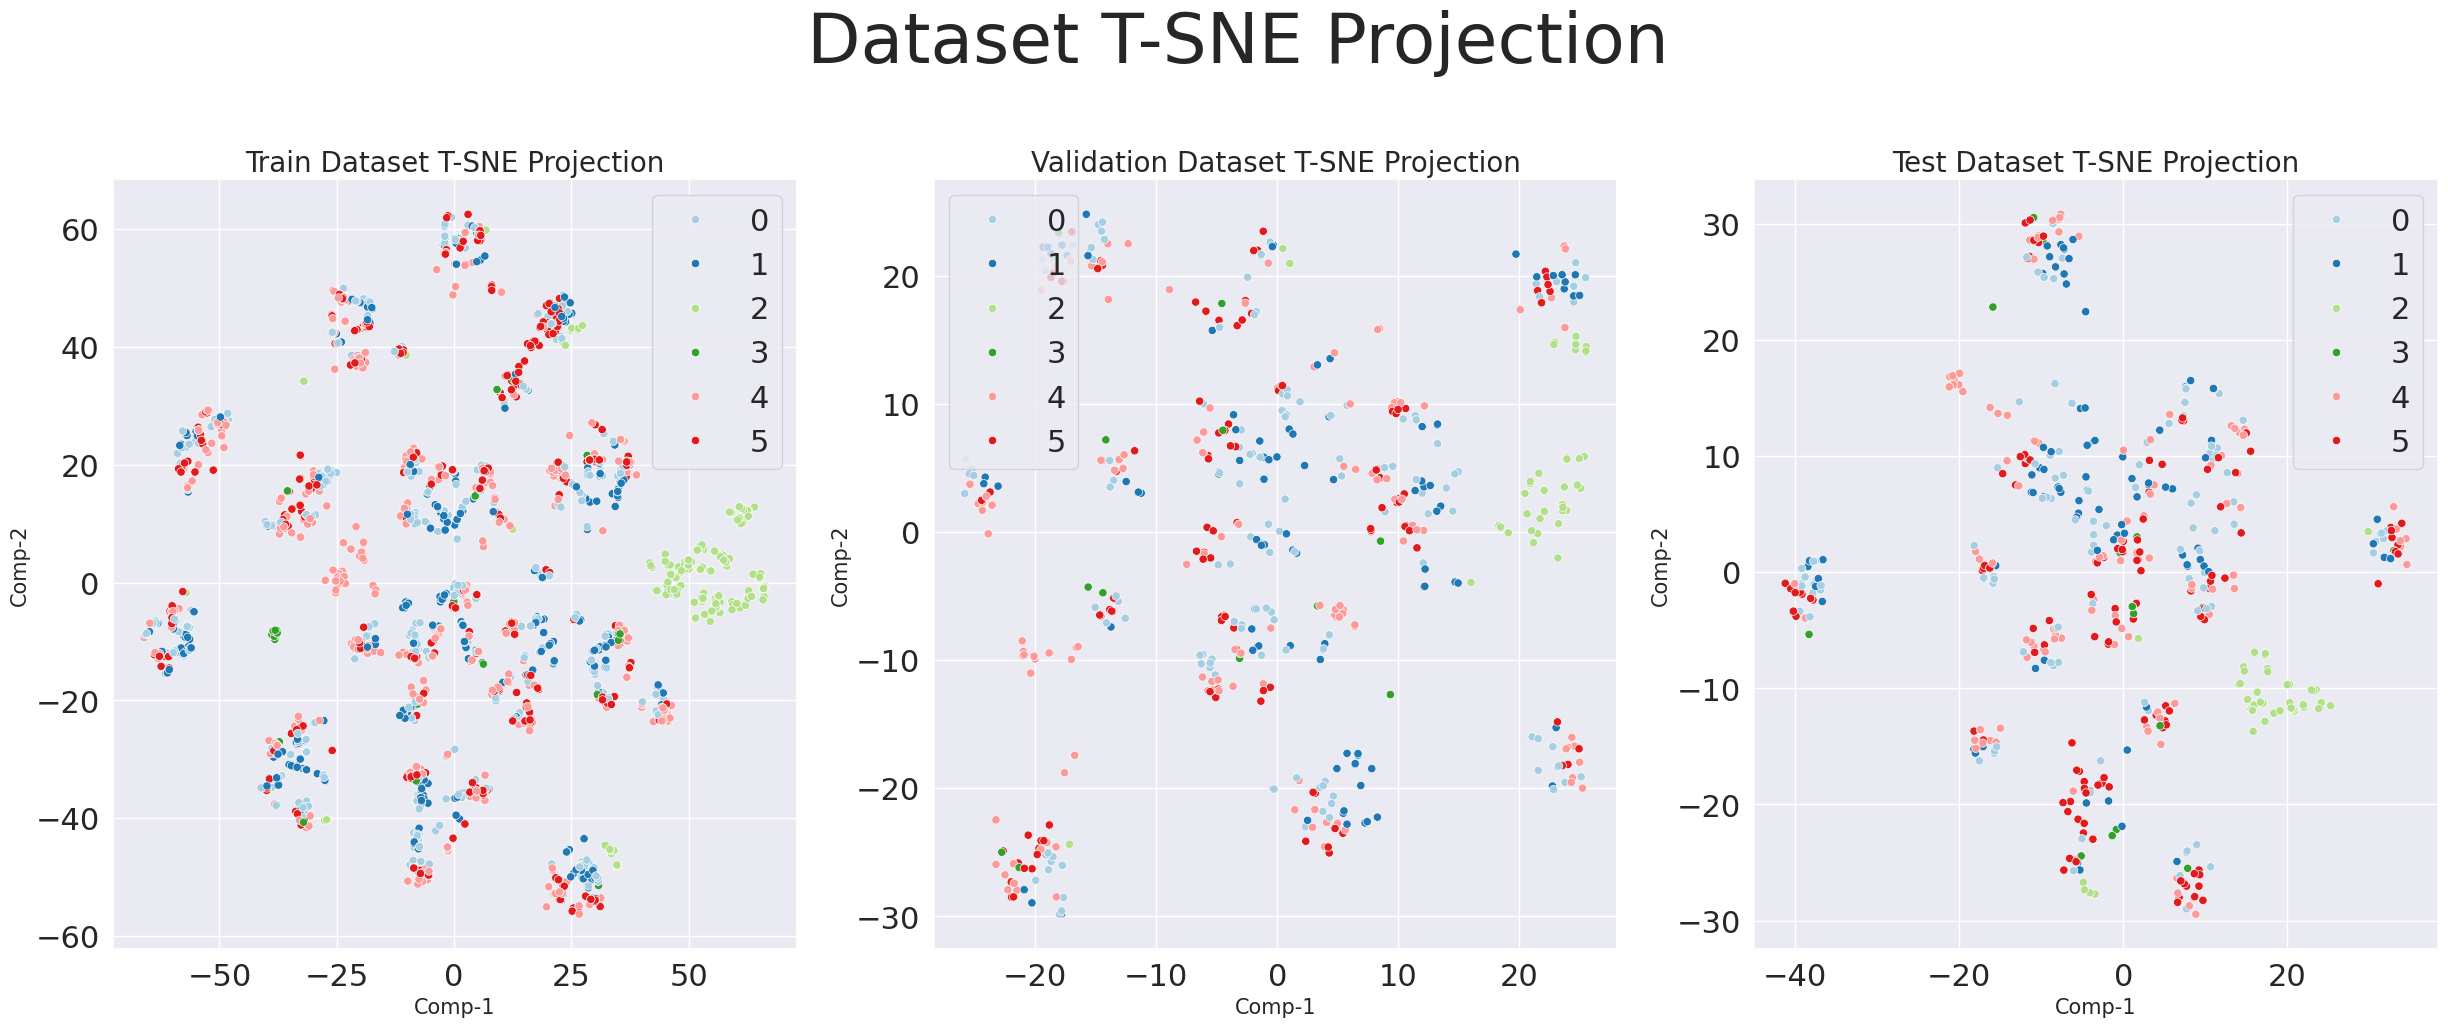

In [ ]:
# Generate T-SNE visualizations for the training, validation, and test datasets
t_sne_plots = [TSNE_visualizer(np.array(X_train_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_val_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_test_scaled, dtype='float'))]

# Define the size of the subplot grid (1 row, 3 columns)
x_size, y_size = 1, 3
# Create a figure with 1 row and 3 columns of subplots, with a specified figure size
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Titles for each subplot
titles = ["Train", "Validation", "Test"]
# Corresponding labels for the training, validation, and test datasets
c = [y_train_encoded, y_val_encoded, y_test_encoded]

# Iterate over each dataset's T-SNE plot
for i in range(3):
    # Get the specific subplot axes for the current dataset
    ax = axes[i]
    # Create a scatter plot of the T-SNE results, colored by the dataset labels
    sns.scatterplot(x=t_sne_plots[i][:, 0], y=t_sne_plots[i][:, 1], hue=c[i], ax=ax, palette="Paired")
    # Set the title, and labels for the subplot
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection", size=20)
    ax.set_xlabel('Comp-1', size=15)
    ax.set_ylabel('Comp-2', size=15)

# Set the main title for the entire figure
plt.suptitle('Dataset T-SNE Projection', size=50, y=1.05)
# Save the plot as a PNG file
plt.savefig("Dataset T-SNE Projection.png")
# Show the plot
plt.show()


## **PCA**

###  **Find the best value of n components, based on test accuracies**

In [ ]:
from sklearn.decomposition import PCA

# Define the range of PCA components to test
n_comp = range(2, 34)

# Initialize lists to store the average test and validation accuracies for each PCA component setting
PCA_test_accuracies = []
PCA_val_accuracies = []

# Loop over the range of PCA components
for i in n_comp:
    # Initialize PCA with the current number of components
    pca = PCA(n_components=i, random_state=0)

    # Fit PCA on the training data and transform it
    pca_train = tf.convert_to_tensor(pca.fit_transform(X_train_scaled))
    # Transform the validation and test data using the fitted PCA
    pca_val = tf.convert_to_tensor(pca.transform(X_val_scaled))
    pca_test = tf.convert_to_tensor(pca.transform(X_test_scaled))

    # Build and evaluate models using the PCA-transformed data
    pca_accuracies_dict, pca_models_dict, pca_models_train_acc, pca_models_test_acc, pca_models_valid_acc = Build_experiment(
        pca_train, y_train_encoded, pca_val, y_val_encoded, pca_test, y_test_encoded,
        optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5
    )

    # Append the average test and validation accuracies to the respective lists
    PCA_test_accuracies.append(pca_accuracies_dict['AVG_test_acc'])
    PCA_val_accuracies.append(pca_accuracies_dict['AVG_valid_acc'])


18/18 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7451


#### **NN Accuracy VS PCA component**

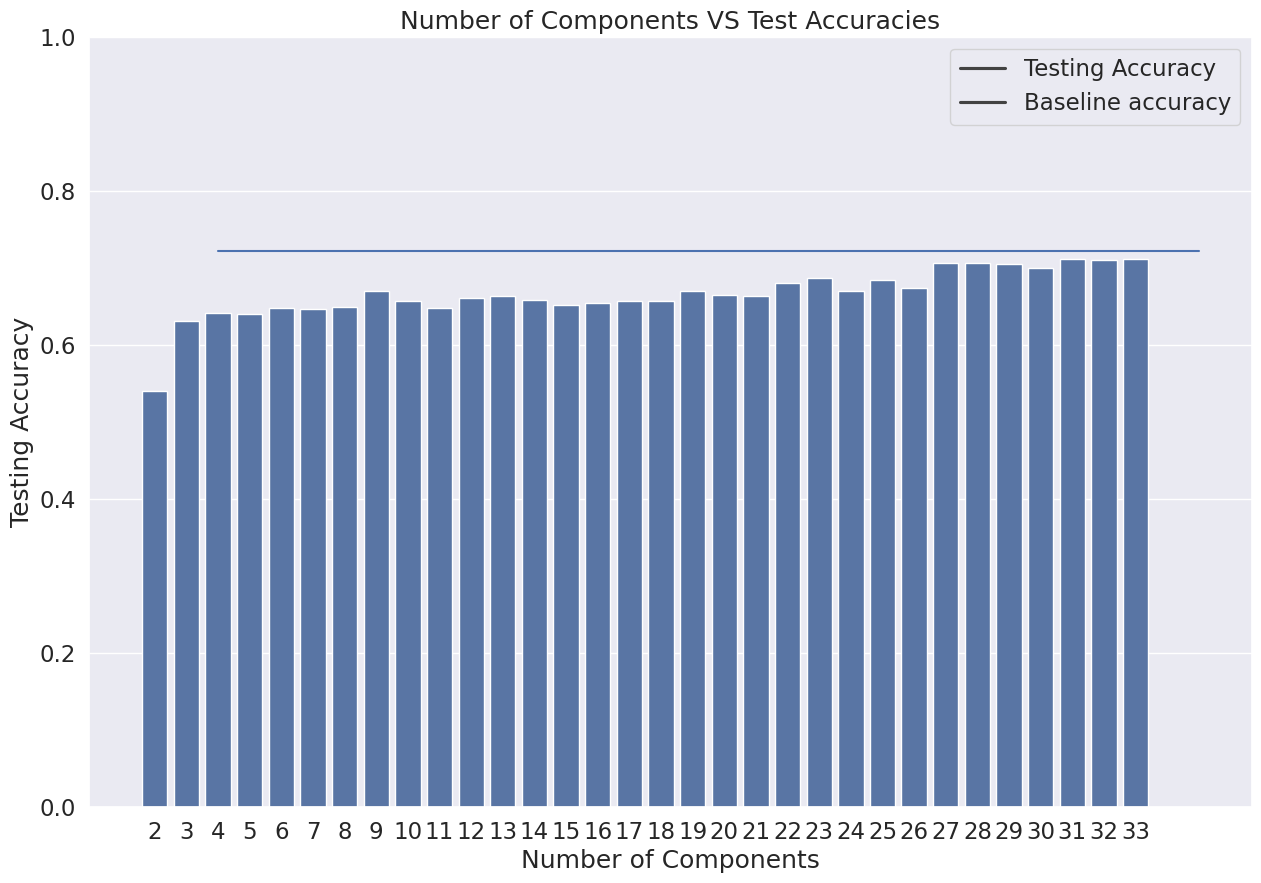

In [ ]:
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)

sns.barplot(x=list(n_comp) , y = PCA_test_accuracies)
sns.lineplot(x= list(n_comp), y = [base_line_accuracies_dict["AVG_test_acc"]]*len(PCA_test_accuracies),sizes=[10]).set(title='Number of Components VS Test Accuracies')
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.legend(['Testing Accuracy','Baseline accuracy'])
plt.ylim(0,1)
plt.show()

#### **2D TSNE plots, one for the training set and one for the test set**

In [ ]:
n_comp=list(n_comp)
best_n_com=n_comp[np.array(PCA_test_accuracies).argmax()]
best_n_com,max(PCA_test_accuracies)

(31, 0.7122994542121888)

## **Train with the best number of componant**

In [ ]:
pca = PCA(n_components=best_n_com)
pca_train = pca.fit_transform(X_train_scaled)
pca_val = pca.transform(X_val_scaled)
pca_test = pca.transform(X_test_scaled)

#### **PLot the T-SNE for the Data after the Dimensionality reduction**

In [ ]:
t_sne_plots = [TSNE_visualizer(np.array(pca_train, dtype='float')),
               TSNE_visualizer(np.array(pca_val, dtype='float')),
               TSNE_visualizer(np.array(pca_test, dtype='float'))]

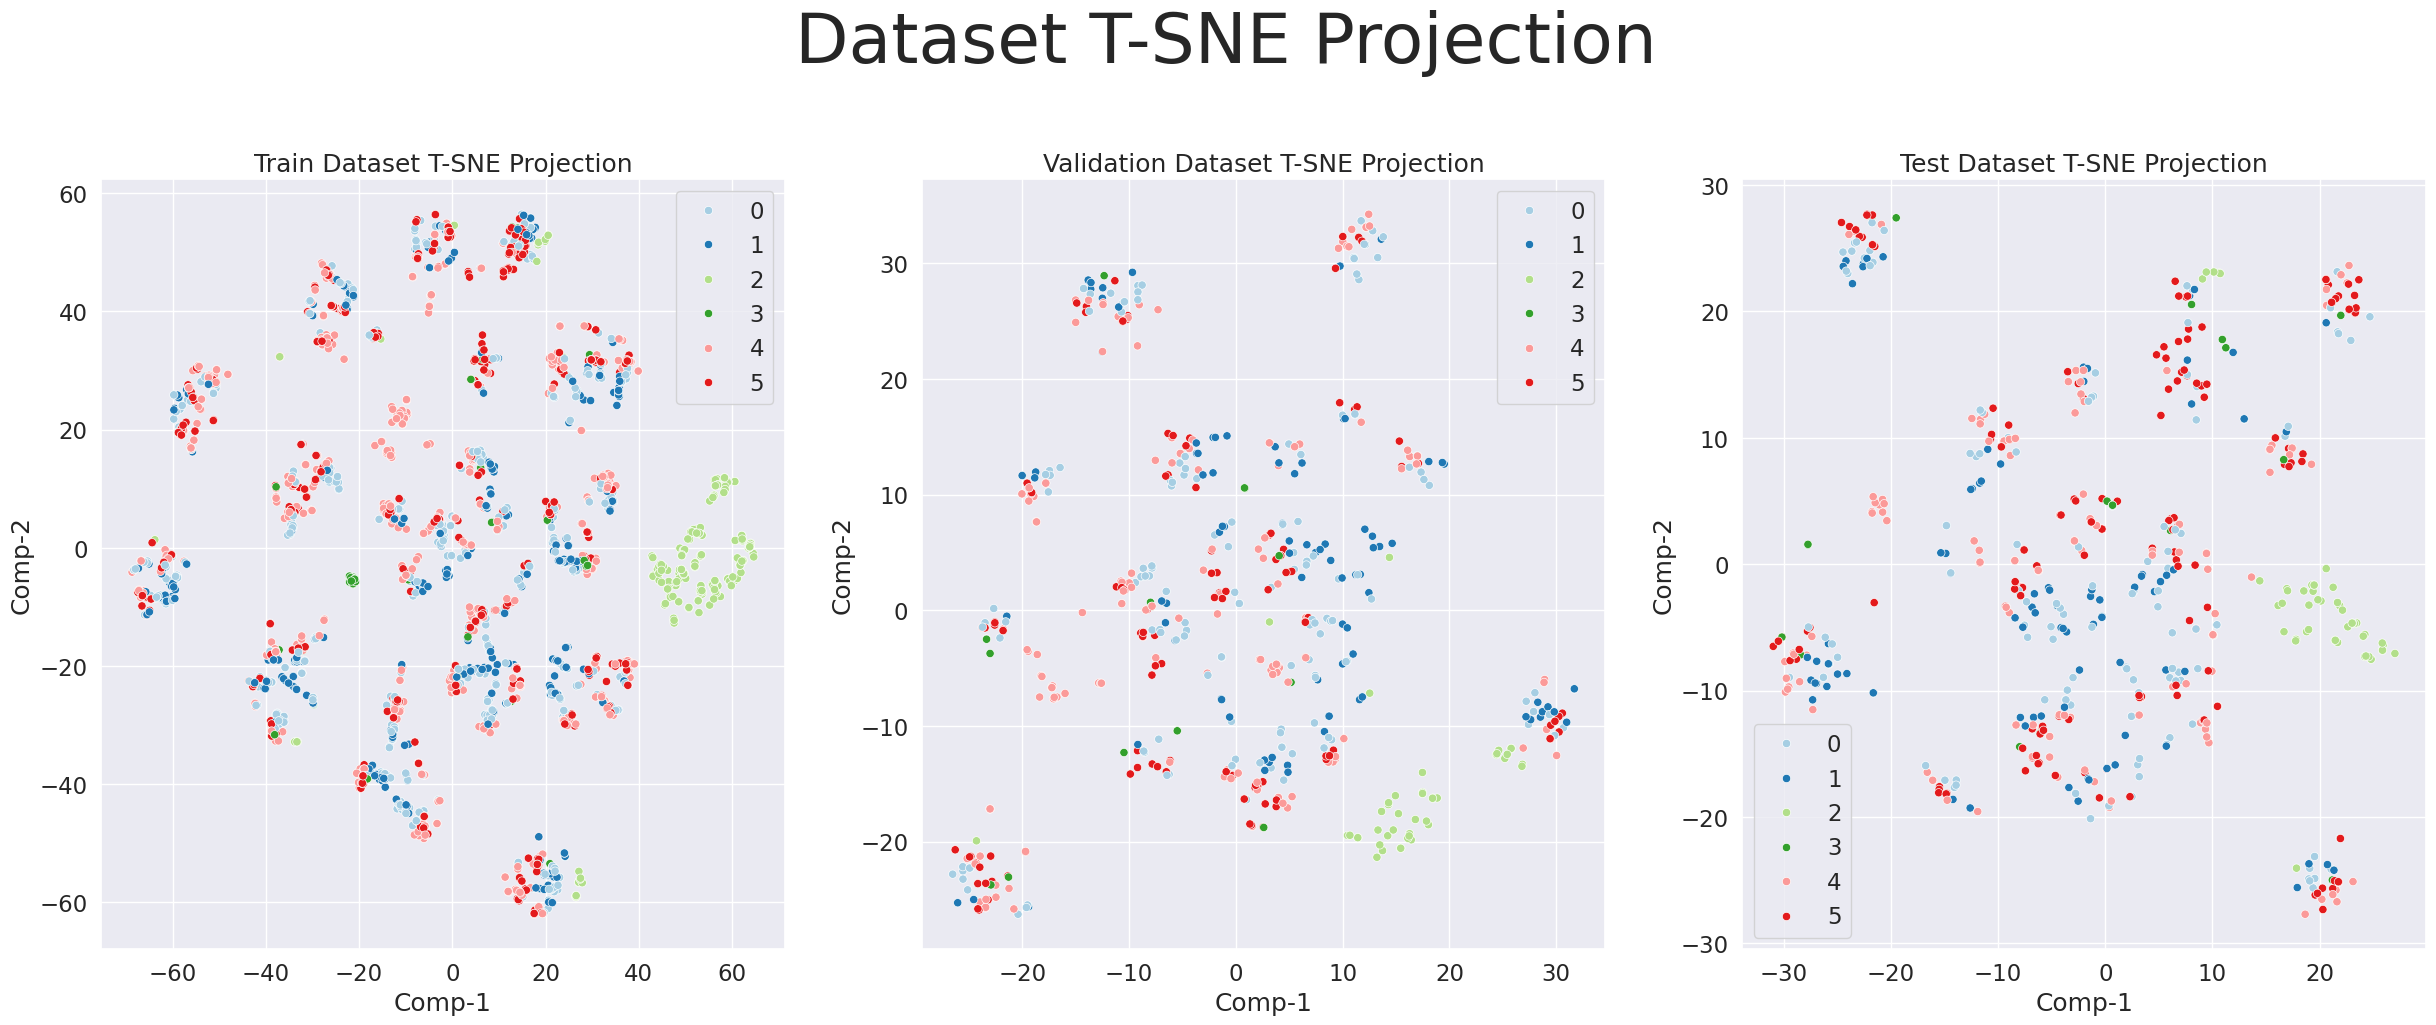

In [ ]:
x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="Paired")
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp-1')
  ax.set_ylabel('Comp-2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

## **Feature Selection - ANOVA and Mutual Information**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Get the number of features in the training dataset
n_features = X_train_scaled.shape[1]

# Define a function for feature selection and model evaluation
def feature_selection(function, X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize lists to store test and validation accuracies, and models for each feature count
    test_accuracies = []
    val_accuracies = []
    models = []

    # Loop over the range of number of features to select (from 1 to the total number of features)
    for i in range(1, n_features + 1):
        # Initialize SelectKBest with the given scoring function and the current number of features
        k_best = SelectKBest(function, k=i)

        # Fit and transform the training data using SelectKBest
        X_train_best = tf.convert_to_tensor(k_best.fit_transform(X_train, y_train))
        # Transform the validation and test data using the fitted SelectKBest
        X_val_best = tf.convert_to_tensor(k_best.transform(X_val))
        X_test_best = tf.convert_to_tensor(k_best.transform(X_test))

        # Build and evaluate models using the selected features
        feature_selection_accuracies_dict, feature_selection_models_dict, feature_selection_models_train_acc, feature_selection_models_test_acc, feature_selection_models_valid_acc = Build_experiment(
            X_train_best, y_train_encoded, X_val_best, y_val_encoded, X_test_best, y_test_encoded,
            optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5
        )

        # Append the models and accuracies to their respective lists
        models.append(feature_selection_models_dict)
        test_accuracies.append(feature_selection_accuracies_dict['AVG_test_acc'])
        val_accuracies.append(feature_selection_accuracies_dict['AVG_valid_acc'])

    # Return the test and validation accuracies, and the models for each feature count
    return test_accuracies, val_accuracies, models


## **Anova**

In [ ]:
anova_test_accuracies,anova_val_accuracies,anova_models=feature_selection(f_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7166


<Axes: title={'center': 'Anova test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

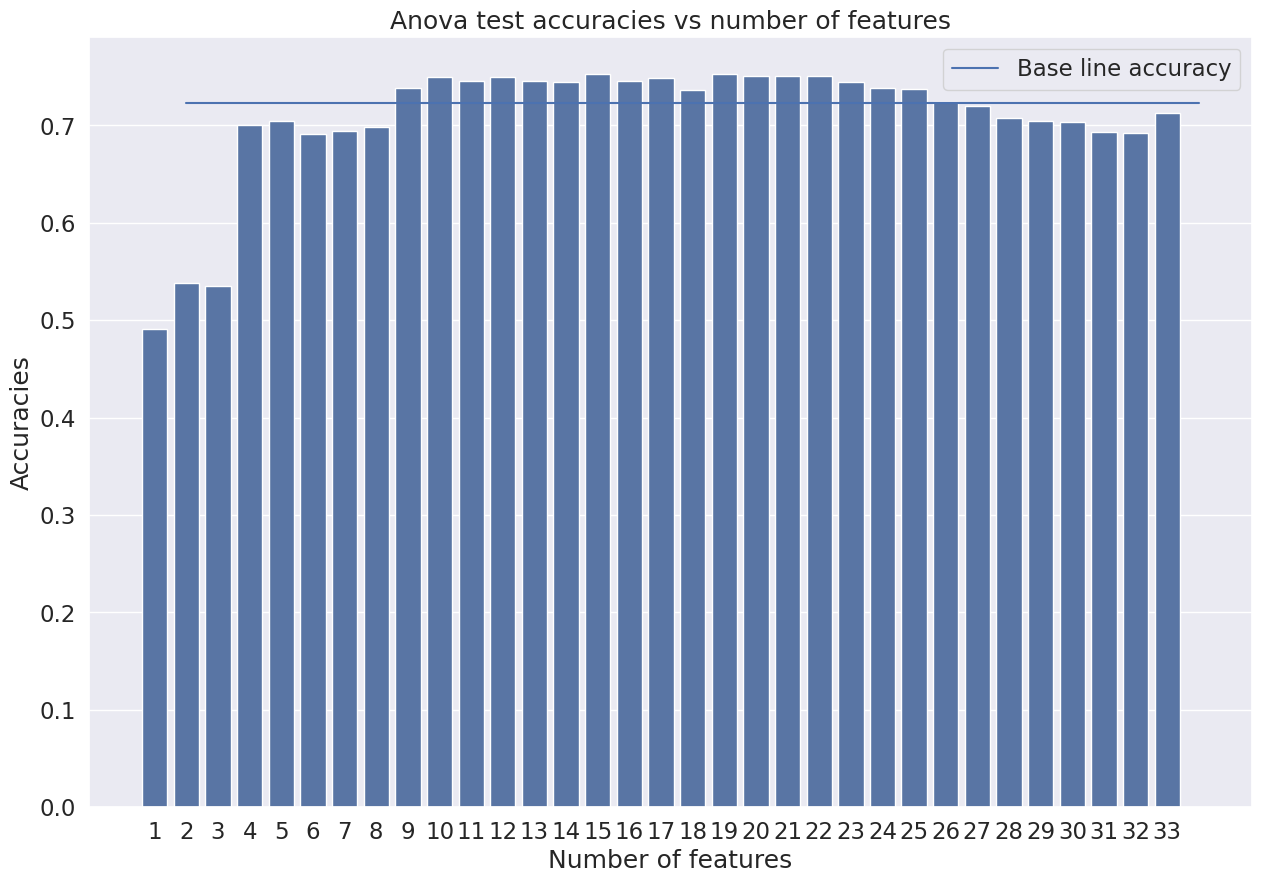

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=anova_test_accuracies).set(title='Anova test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')


## **Mutual information**

In [ ]:
mutual_information_test_accuracies,mutual_information_val_accuracies,mutual_information_models=feature_selection(mutual_info_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7308


<Axes: title={'center': 'Mutual information test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

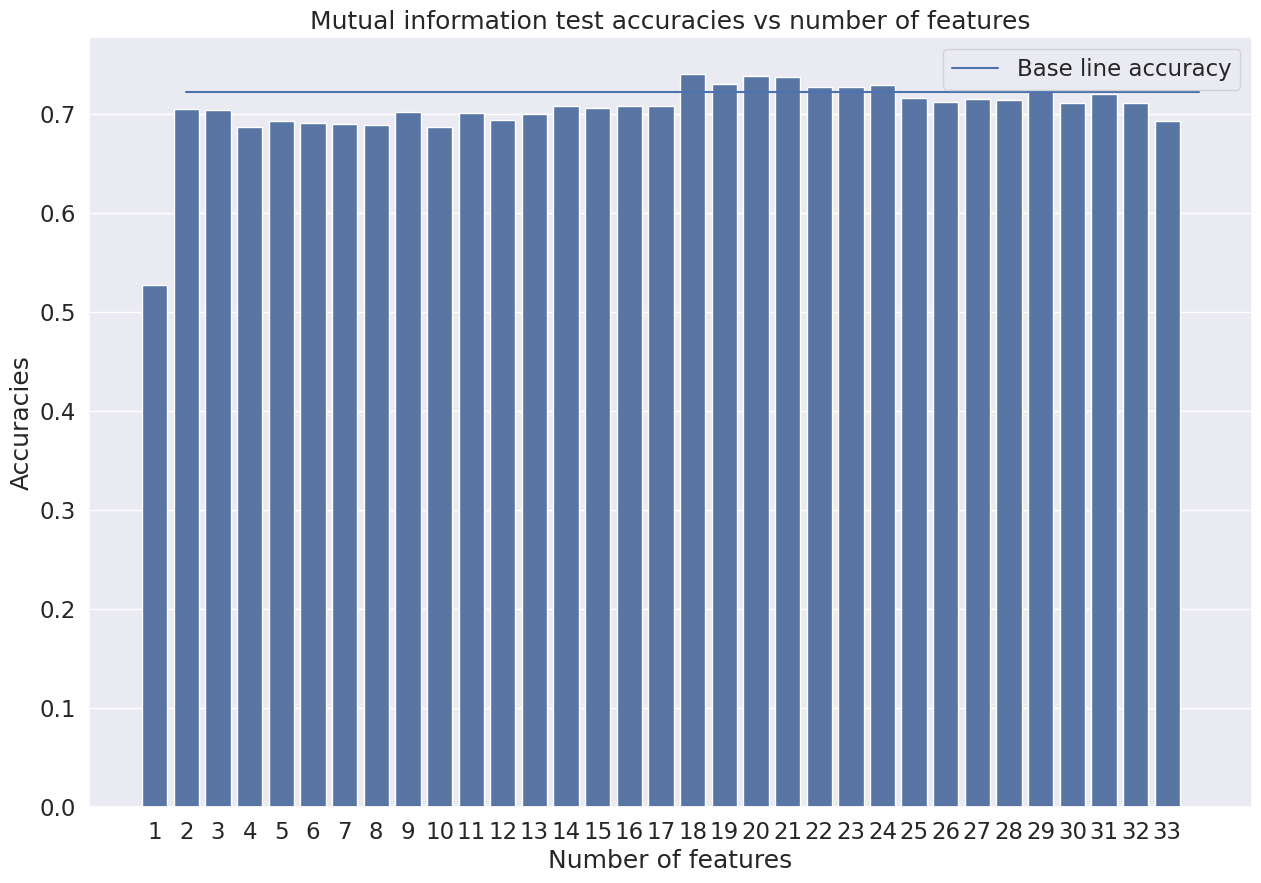

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=mutual_information_test_accuracies).set(title='Mutual information test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')


## **Choose the method that achieves the best test accuracy results (either ANOVA or Mutual information)**

In [ ]:
max(anova_test_accuracies),max(mutual_information_test_accuracies)

(0.7529411792755127, 0.7404634594917298)

<Axes: >

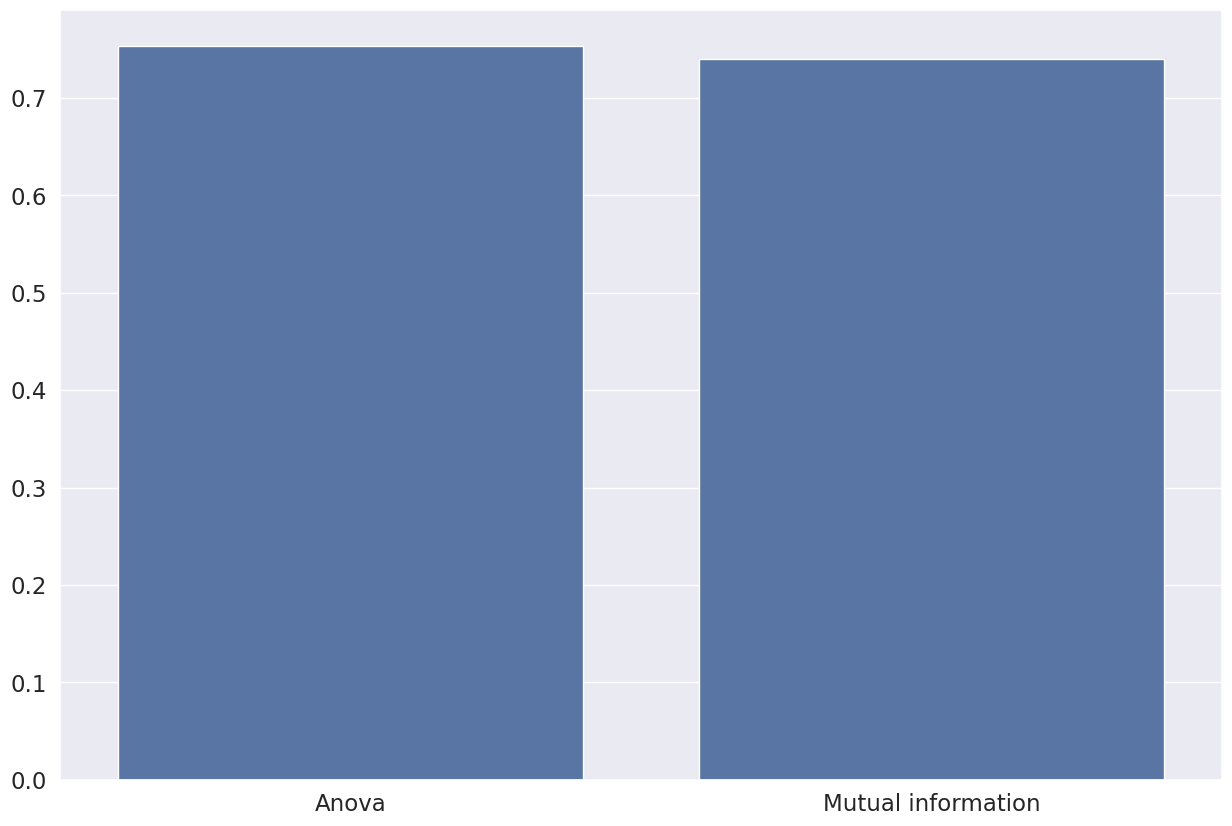

In [ ]:
sns.barplot(x=["Anova","Mutual information"],y=[max(anova_test_accuracies),max(mutual_information_test_accuracies)])

#### **Anova has the higher accuracy**




## **Get the highest anova model**

In [ ]:
n_features_arr=list(range(1,n_features+1))
best_n_feature_anova=n_features_arr[np.array(anova_test_accuracies).argmax()]
best_n_feature_anova

15

## **TSNE for the Data with best_n_features using anova**

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova=k_best.transform(X_val_scaled)
X_test_best_anova=k_best.transform(X_test_scaled)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
X_train_best_anova_tsne= tsne.fit_transform(X_train_best_anova)
X_val_best_anova_tsne= tsne.fit_transform(X_val_best_anova)
X_test_best_anova_tsne= tsne.fit_transform(X_test_best_anova)
X_train_best_anova_tsne

array([[-51.121597,   2.725103],
       [-29.234741, -28.809834],
       [ 49.690174,  26.171247],
       ...,
       [ 15.428304, -38.68544 ],
       [ 17.774647,  54.09829 ],
       [ 11.575999,  12.349681]], dtype=float32)

[Text(0.5, 1.0, 'Test Data after using anova with number of features = 11'),
 Text(0.5, 0, 'Feature1'),
 Text(0, 0.5, 'Feature2')]

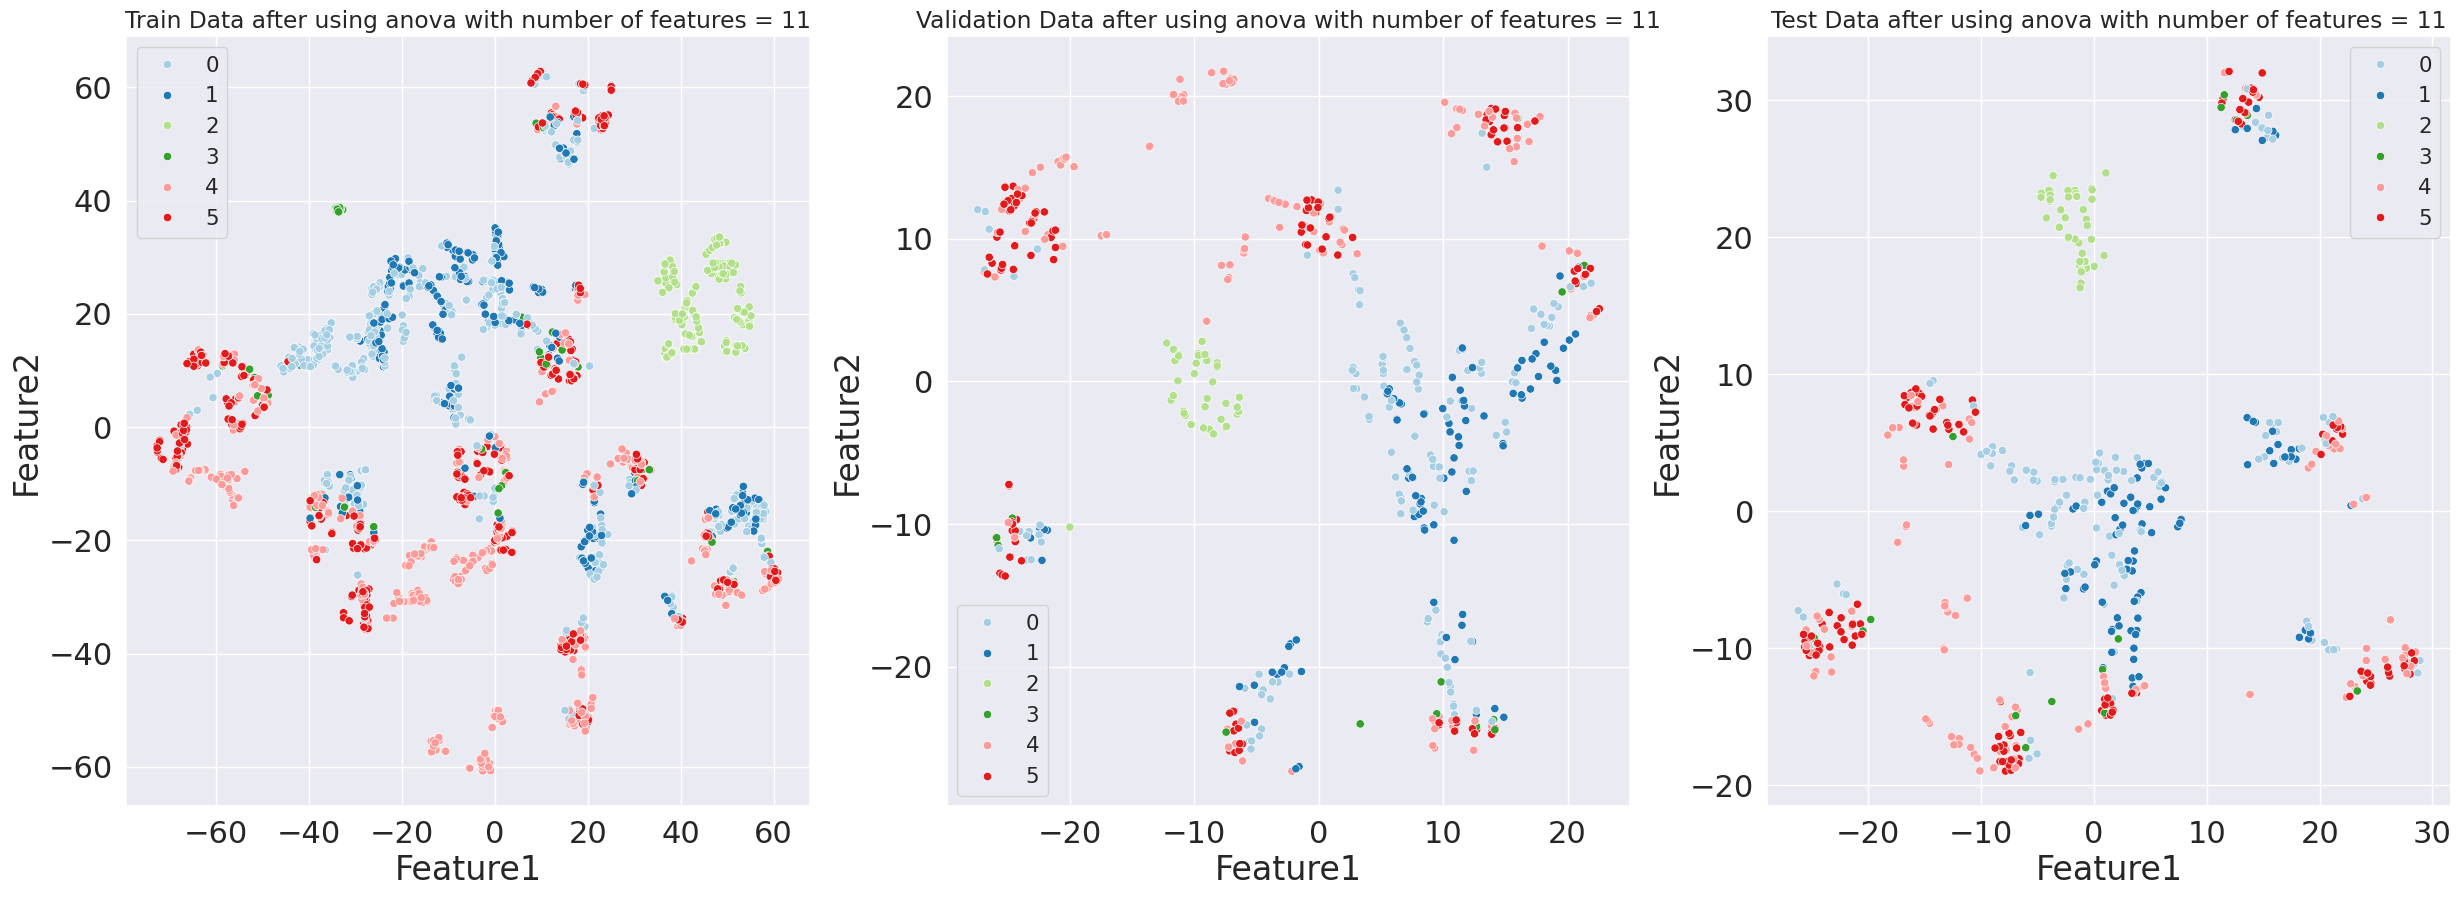

In [ ]:
figs,axis=plt.subplots(1,3,figsize=(30,10))
# sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.4)
sns.scatterplot(x=X_train_best_anova_tsne[:,0], y=X_train_best_anova_tsne[:,1], hue=y_train_encoded, ax=axis[0], palette="Paired").set(title='Train Data after using anova with number of features = 11', xlabel='Feature1', ylabel='Feature2')
sns.scatterplot(x=X_val_best_anova_tsne[:,0],y=X_val_best_anova_tsne[:,1],hue=y_val_encoded,ax=axis[1],palette="Paired").set(title='Validation Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')
sns.scatterplot(x=X_test_best_anova_tsne[:,0],y=X_test_best_anova_tsne[:,1],hue=y_test_encoded,ax=axis[2],palette="Paired").set(title='Test Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')

#### **Updated the dataset, to be used in the next steps, based on the technique that provides us with highest validation accuracy**

In [ ]:
max(anova_val_accuracies), max(PCA_val_accuracies)

(0.7557932257652282, 0.7361853837966919)

Text(0, 0.5, 'Validation Accuracies')

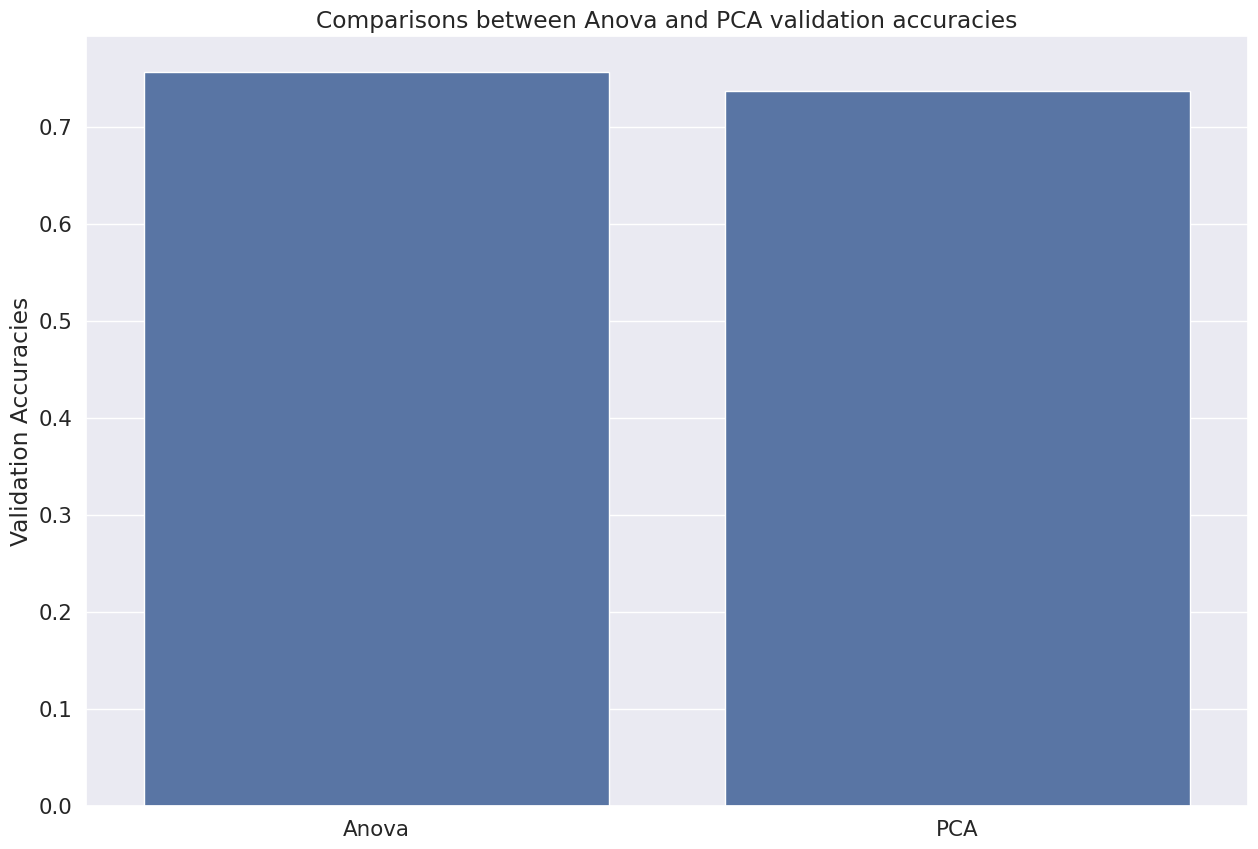

In [ ]:
sns.barplot(x=["Anova", "PCA"], y=[max(anova_val_accuracies), max(PCA_val_accuracies)])
plt.title('Comparisons between Anova and PCA validation accuracies')
plt.ylabel('Validation Accuracies')

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova_val=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova_val=k_best.transform(X_val_scaled)
X_test_best_anova_val=k_best.transform(X_test_scaled)

## **The average confusion matrix for the highest validation accuracy**

18/18 [==============================] - 0s 2ms/step


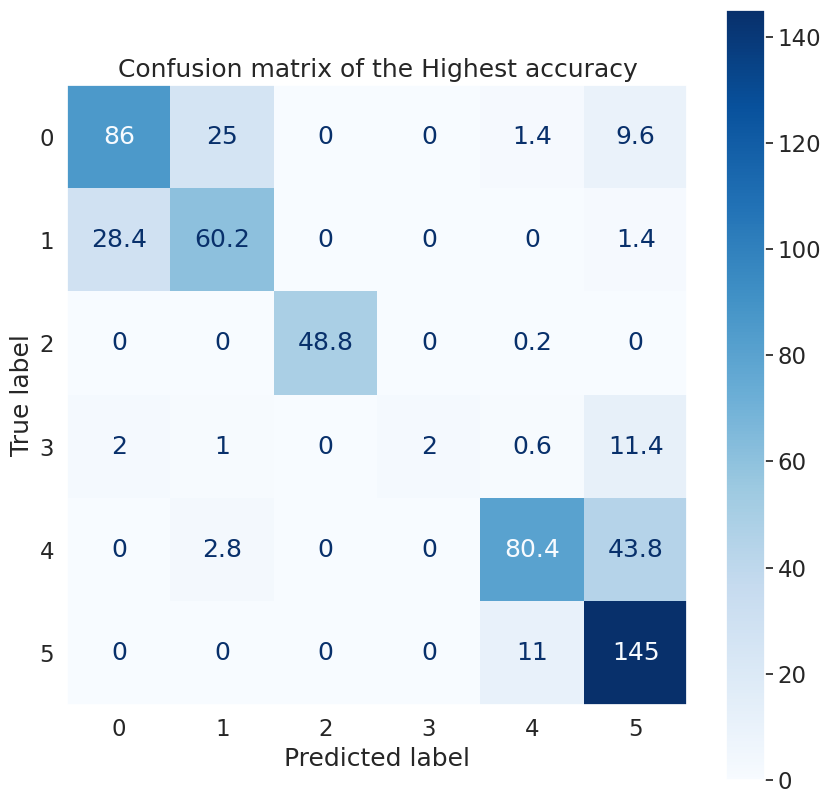

In [ ]:
idx_anova=np.array(anova_test_accuracies).argmax()
highest_val_anova_models=anova_models[idx_anova]

# Calculate the Average confusion test matrix
cm1 = np.zeros(shape=(6, 6))
for model in highest_val_anova_models['models']:
    pred = model.predict(X_test_best_anova_val).argmax(axis=1)
    cm1 += confusion_matrix(y_test_encoded, pred)
cm_avg_1 = cm1 / len(base_line_models_dict['models'])
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg_1, )
disp = disp.plot(cmap=plt.cm.Blues, values_format='g', )

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

# **Varying the MultiLayer Perceptron(MLP) parameters**

###  **Batch size**

In [ ]:
batches = [32,64,128]
batch_accuracies_dict_list = []
for batch_size in batches:
    batch_accuracies_dict, batch_models_dict,batch_models_train_acc,batch_models_test_acc,batch_models_valid_acc = Build_experiment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=batch_size, n_of_models=5)
    batch_accuracies_dict_list.append(batch_accuracies_dict)

18/18 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7594


### **Batch_size 32**

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[0])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.749523,0.766705,0.759221,0.755793,0.780749,0.767558,0.743316,0.773619,0.756506


### **Batch_size 64**


In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[1])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.748377,0.777778,0.757083,0.741533,0.778966,0.761854,0.737968,0.775401,0.74902


### **Batch_size=128**

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[2])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.757159,0.765178,0.761588,0.748663,0.768271,0.756506,0.759358,0.771836,0.766132


### **Highest average test accuracy**

In [ ]:
idx=np.array([batch_accuracies_dict_list[0]['AVG_valid_acc'],batch_accuracies_dict_list[1]['AVG_valid_acc'],batch_accuracies_dict_list[2]['AVG_valid_acc']]).argmax()
best_batch_size=batches[idx]
best_batch_size

128

### **Hidden layers vs. neurons/layer**

In [ ]:
n_hidden_layers = [1,2,4,8]
n_neurons = [10,20,30,40]
hidden_accuracies_dict_list = {1:[],2:[],4:[],8:[]}

for n_hidden in n_hidden_layers:
    for n_neuron in n_neurons:
        hidden_accuracies_dict, hidden_models_dict,hidden_models_train_acc,hidden_models_test_acc,hidden_models_valid_acc = Build_experiment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=n_hidden, n_neurons=n_neuron, activation='relu', epochs=500, batch_size=best_batch_size, n_of_models=5)
        hidden_accuracies_dict_list[n_hidden].append(hidden_accuracies_dict)

18/18 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.8057


### **Using 1 hidden layer**

In [ ]:
hidden_layers_1=pd.DataFrame(hidden_accuracies_dict_list[1])
hidden_layers_1

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.751050,0.771287,0.761588,0.754011,0.768271,0.762567,0.734403,0.773619,0.754367
1,0.770141,0.776250,0.772356,0.759358,0.780749,0.766845,0.770053,0.778966,0.773619
2,0.764032,0.792287,0.774876,0.757576,0.787879,0.773619,0.754011,0.795009,0.773619
3,0.772050,0.786942,0.779840,0.761141,0.777184,0.770410,0.762923,0.787879,0.780749


### **Using 2 hidden layers**

In [ ]:
hidden_layers_2=pd.DataFrame(hidden_accuracies_dict_list[2])
hidden_layers_2

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.760596,0.778923,0.770218,0.746881,0.773619,0.763993,0.737968,0.786096,0.765775
1,0.779687,0.787705,0.783276,0.755793,0.782531,0.771836,0.777184,0.793226,0.786809
2,0.783123,0.790378,0.787553,0.770053,0.787879,0.780036,0.768271,0.795009,0.787166
3,0.779687,0.788851,0.785262,0.766488,0.778966,0.773975,0.782531,0.795009,0.787166


### **Using 4 hidden layers**

In [ ]:
hidden_layers_4=pd.DataFrame(hidden_accuracies_dict_list[4])
hidden_layers_4

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.751432,0.776632,0.763268,0.752228,0.784314,0.762923,0.743316,0.777184,0.758645
1,0.789614,0.807942,0.797785,0.768271,0.798574,0.783601,0.773619,0.798574,0.786096
2,0.793433,0.814815,0.803971,0.771836,0.802139,0.790018,0.782531,0.812834,0.797148
3,0.798778,0.819779,0.806491,0.782531,0.802139,0.792513,0.786096,0.803922,0.797504


### **Using 8 hidden layers**

In [ ]:
hidden_layers_8=pd.DataFrame(hidden_accuracies_dict_list[8])
hidden_layers_8

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.720122,0.768614,0.748683,0.714795,0.782531,0.749020,0.713012,0.761141,0.742246
1,0.781978,0.809469,0.793891,0.764706,0.802139,0.787522,0.768271,0.807487,0.789661
2,0.781596,0.814051,0.796334,0.764706,0.807487,0.781818,0.782531,0.814617,0.793939
3,0.786178,0.825506,0.808324,0.784314,0.818182,0.800000,0.796791,0.811052,0.804635


### **Plot the number of neurons vs the avg test accuracy**

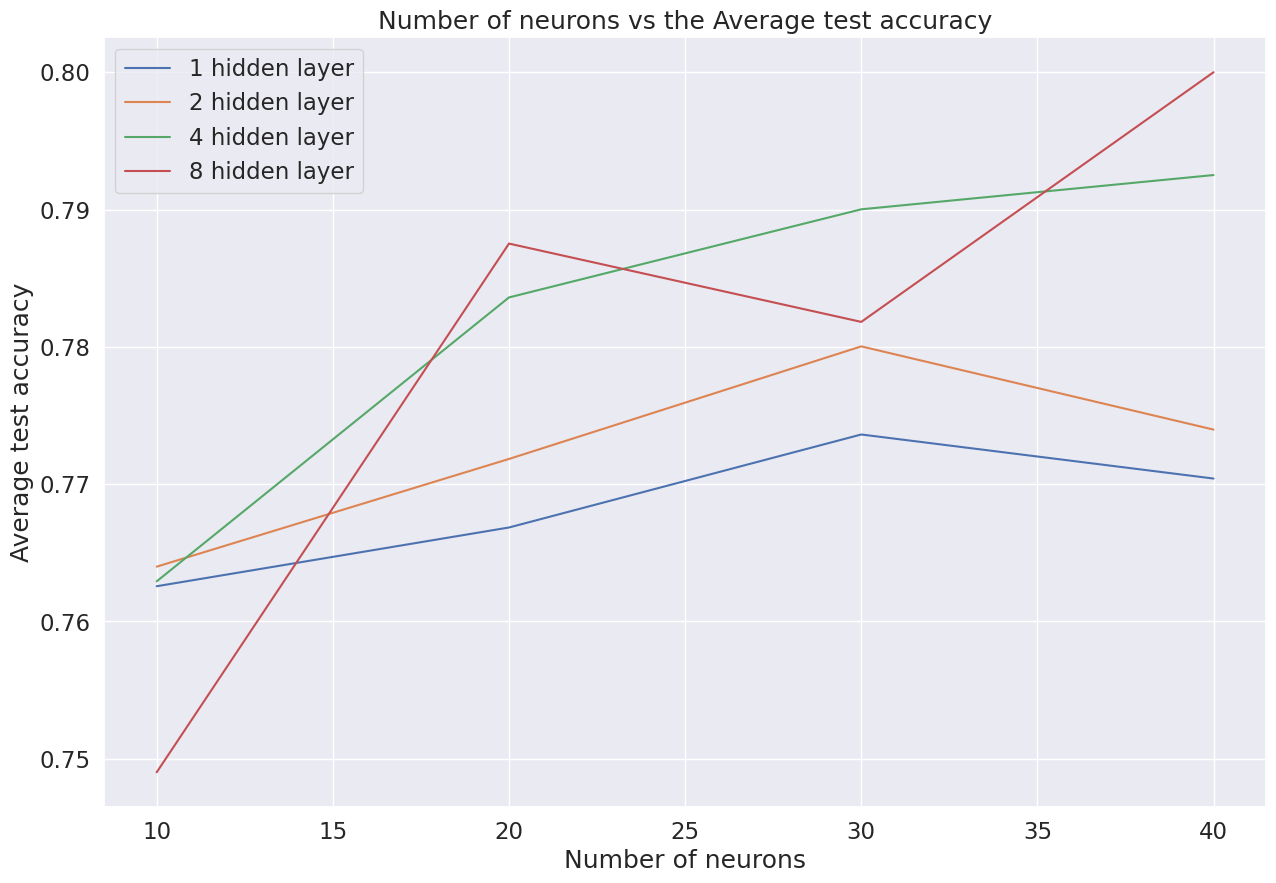

In [ ]:
sns.lineplot(x=n_neurons,y=hidden_layers_1['AVG_test_acc'],label='1 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_2['AVG_test_acc'],label='2 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_4['AVG_test_acc'],label='4 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_8['AVG_test_acc'],label='8 hidden layer')
plt.title('Number of neurons vs the Average test accuracy')
plt.xlabel('Number of neurons')
plt.ylabel('Average test accuracy')
plt.show()

### **Get the best number of neurons and hidden layers**

In [ ]:
maxi=-99999
best_neurons=-9999
best_hidden=-9999
hidden_layers_list=[hidden_layers_1,hidden_layers_2,hidden_layers_4,hidden_layers_8]
for i,hidden_layer in enumerate(hidden_layers_list) :
    if max(hidden_layer['AVG_valid_acc']) >maxi :
        maxi=max(hidden_layer['AVG_valid_acc'])
        idx=np.array(hidden_layer['AVG_valid_acc']).argmax()
        best_neurons=n_neurons[idx]
        best_hidden=n_hidden_layers[i]
best_neurons,best_hidden

(40, 8)

## **Activation functions**

In [ ]:
activations=['relu','leaky_relu','sigmoid','tanh']
activation_accuracies_dict_list = {}

maxi_activation=-9999
best_activation=''
best_model=0
for activation in activations :
    activation_accuracies_dict, activation_models_dict,activation_models_train_acc,activation_models_test_acc,activation_models_valid_acc = Build_experiment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, 'AdamW', n_of_hidden_layers=best_hidden, n_neurons=best_neurons, activation=activation, epochs=500, batch_size=best_batch_size, n_of_models=5)
    if activation_accuracies_dict['AVG_test_acc'] >maxi_activation :
        maxi_activation=activation_accuracies_dict['AVG_test_acc']
        best_activation=activation
        best_model=activation_models_dict['models'][np.array(activation_models_test_acc).argmax()]
    activation_accuracies_dict_list[activation]=activation_accuracies_dict

18/18 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8093


In [ ]:
dfs=[]
for i in activation_accuracies_dict_list.keys():
    dfs.append(pd.DataFrame(pd.Series(activation_accuracies_dict_list[i])).transpose())
activation_results=pd.concat(dfs)
activation_results.index=activations
activation_results

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
relu,0.789996,0.814051,0.801680,0.771836,0.807487,0.795009,0.802139,0.821747,0.810339
leaky_relu,0.781978,0.800687,0.794807,0.775401,0.803922,0.792157,0.798574,0.811052,0.803565
sigmoid,0.446735,0.703322,0.575716,0.409982,0.734403,0.596078,0.475936,0.720143,0.599287
tanh,0.782741,0.799160,0.792593,0.786096,0.802139,0.795365,0.795009,0.811052,0.804991


In [ ]:
activation_accuracies_dict_list

{'relu': {'Min_train_acc': 0.7899962067604065,
  'Max_train_acc': 0.8140511512756348,
  'AVG_train_acc': 0.8016800284385681,
  'Min_test_acc': 0.77183598279953,
  'Max_test_acc': 0.8074866533279419,
  'AVG_test_acc': 0.79500892162323,
  'Min_valid_acc': 0.8021390438079834,
  'Max_valid_acc': 0.8217468857765198,
  'AVG_valid_acc': 0.8103386878967285},
 'leaky_relu': {'Min_train_acc': 0.7819778323173523,
  'Max_train_acc': 0.800687313079834,
  'AVG_train_acc': 0.7948071837425232,
  'Min_test_acc': 0.7754010558128357,
  'Max_test_acc': 0.8039215803146362,
  'AVG_test_acc': 0.7921568512916565,
  'Min_valid_acc': 0.7985739707946777,
  'Max_valid_acc': 0.8110516667366028,
  'AVG_valid_acc': 0.8035650610923767},
 'sigmoid': {'Min_train_acc': 0.4467353820800781,
  'Max_train_acc': 0.7033218741416931,
  'AVG_train_acc': 0.5757159173488617,
  'Min_test_acc': 0.40998217463493347,
  'Max_test_acc': 0.7344028353691101,
  'AVG_test_acc': 0.5960784137248993,
  'Min_valid_acc': 0.47593581676483154,
  

## **Confusion matrix for the highest average accuracy**

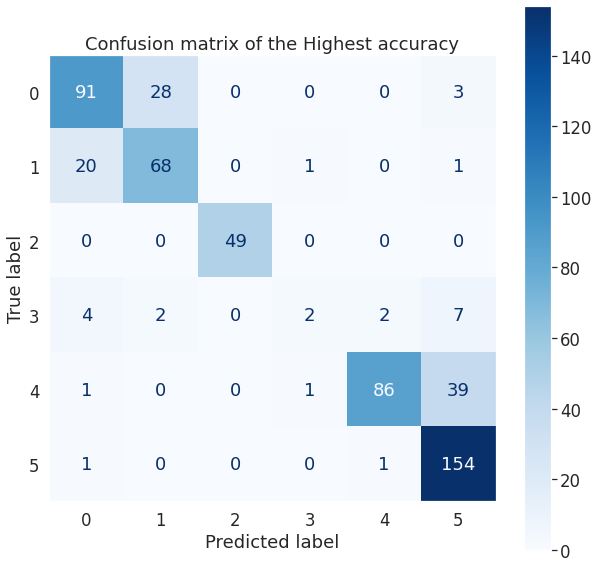

In [ ]:
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

pred = best_model.predict(X_test_best_anova_val).argmax(axis=1)
cm = confusion_matrix(y_test_encoded, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()